# Exploration of customer purchasing behavior


**Adding the project directory to thse system path**

In [1]:
import pandas as pd
import os
notebook_dir = os.getcwd()
parent_path=os.path.dirname(notebook_dir)

os.chdir(parent_path)

In [2]:
from script.EDA import CustomerBehaviorAnalyzer

**Instantiate the the class**

In [3]:
#instantiate class
analyzer=CustomerBehaviorAnalyzer()

**Loading the csv data to a pandas dataframe**

In [4]:
train_df=pd.read_csv("data\\train.csv",low_memory=False)

In [5]:
store_df=pd.read_csv("data\\store.csv")

In [6]:
test_df=pd.read_csv("data\\test.csv")

### Check missing values of Train data

In [7]:
analyzer.missing_value(train_df)

2024-09-20 22:51:24,028 - INFO - Check missing values


Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

**There are no missing values but outliers must be dealed with.**
* *Imputing outliers of 'Sales' and 'Customers' features of train data with mean*

In [8]:
analyzer.replace_outliers_with_mean(train_df)

2024-09-20 22:51:24,134 - INFO - replace outliers of Sales and Customer


### Check missing values of Store data

In [9]:
analyzer.missing_value(store_df)

2024-09-20 22:51:24,522 - INFO - Check missing values


Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

**Hanldle the missing values in store**
* *Fill missing CompetitionDistance with a new category*
* *Fill missing CompetitionOpenSinceMonth and Year with 0*
* *For Promo2 related columns, fill missing values with 0 or 'None'*

In [10]:
analyzer.handle_missing_values(store_df)

2024-09-20 22:51:24,542 - INFO - handle missing values


**Merging the store data with the train data to get more features about each stores**

In [11]:
merged_df = pd.merge(train_df, store_df, on="Store", how="left")

### Compare promo distribution 
**Implications of Promo Distribution**
* Model Generalization: A balanced distribution of promotions in both sets suggests that the model is more likely to generalize well to new, unseen data.
* Fairness: A balanced distribution helps to prevent the model from making biased predictions based on the prevalence of promotions in the training data.
* Evaluation Accuracy: A balanced distribution allows for a more accurate evaluation of the model's performance, as the model is not unfairly advantaged or disadvantaged by an imbalanced dataset.


2024-09-20 22:51:24,942 - INFO - Promo Distribution Comparison: Train vs Test......


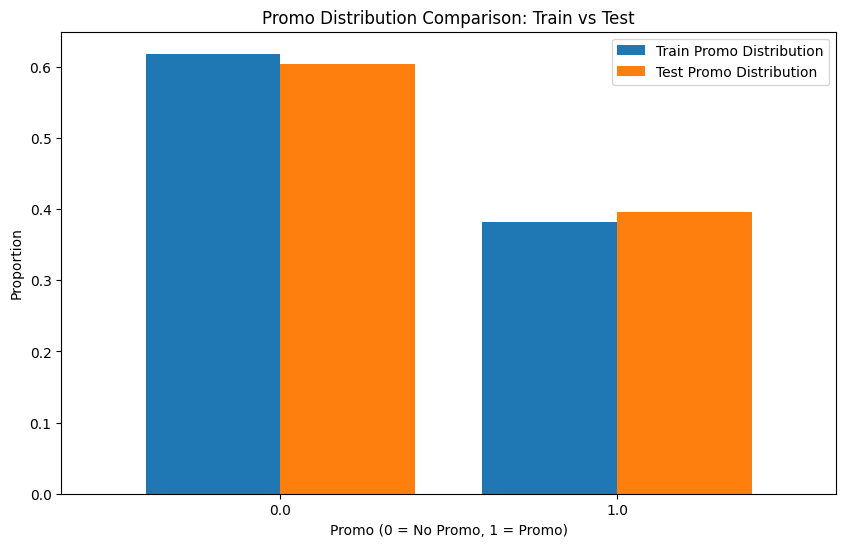

In [12]:
analyzer.compare_promo_distribution(train_df,test_df)

###  Compare sales behavior before, during, and after holidays
**Importance of Comparison:**
By comparing sales before, during, and after holidays, we can:

* Identify Peak Periods: Understand when sales peak and align promotions, inventory, and staff schedules accordingly.
* Optimize Promotions: Determine which holidays to focus on for maximum sales, adjusting promotions and discounts for the most effective timing.
* Plan Resource Allocation: Allocate resources (staffing, products, etc.) based on expected customer behavior.

2024-09-20 22:51:25,455 - INFO - Compare sales behavior before, during, and after holidays.....


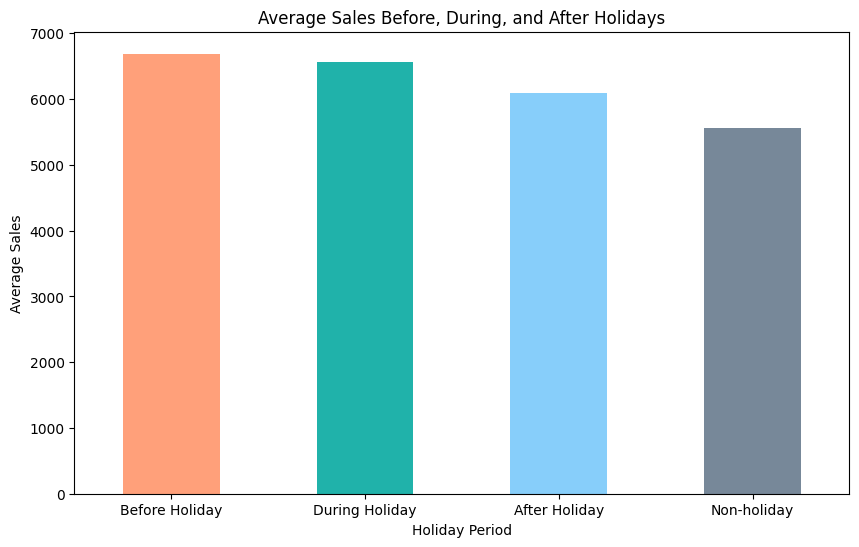

In [13]:
analyzer.compare_sales_holiday_periods(merged_df)

### Seasonal sales behaviors, particularly around major holidays like Christmas and Easter.
Understanding seasonal sales patterns around major holidays is crucial for optimizing inventory, staffing, promotions, and overall store operations. For Rossmann stores, significant holidays like Christmas and Easter play a key role in shaping customer behavior and sales trends.These patterns provide actionable insights for Rossmann to optimize its operations during key seasonal periods.

2024-09-20 22:51:27,965 - INFO - Analyze seasonal sales behaviors, particularly around major holidays like Christmas and Easter.


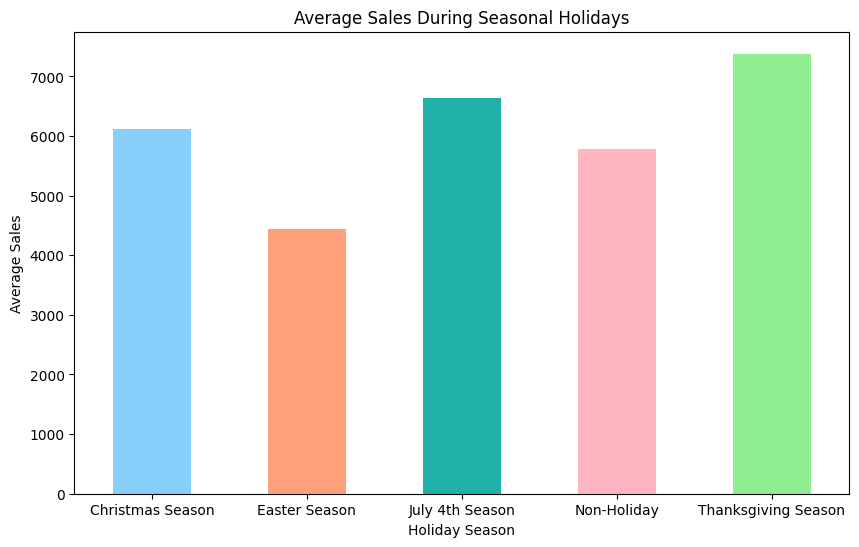

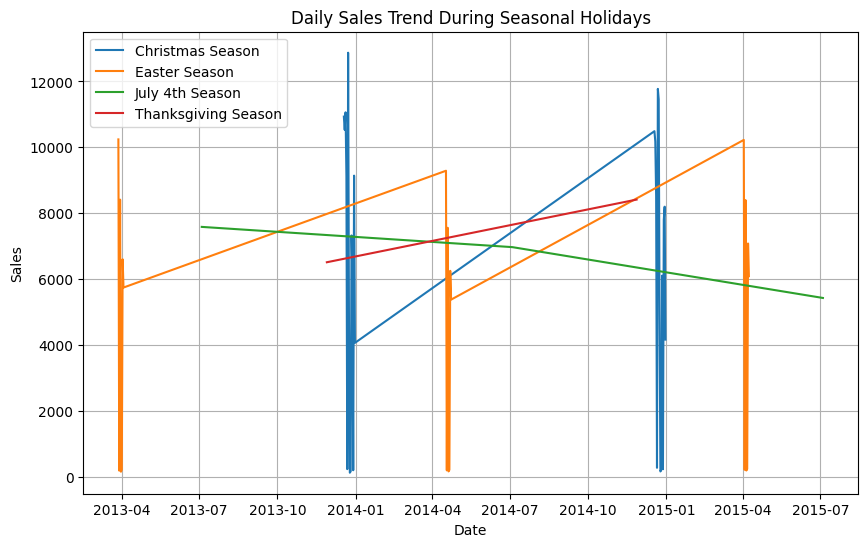

In [14]:
analyzer.analyze_seasonal_sales(merged_df)

### Correlation between customer and sales
The correlation between customers and sales is a key indicator of how customer traffic impacts revenue in retail. Here's a breakdown of this relationship:

1. Positive Correlation:
Typically, there is a strong positive correlation between the number of customers and sales. As the number of customers increases, sales tend to rise as well.In retail stores like Rossmann, the volume of sales is directly influenced by customer footfall. For instance, stores with high traffic usually generate higher sales, especially during promotions or peak shopping times (e.g., holidays or weekends).
2. Magnitude of Impact:
Correlation Strength: The strength of the correlation between the number of customers and sales can be quantified using correlation coefficients.
3. Impact of Promotions:
Promotions tend to amplify the correlation between customers and sales. 

2024-09-20 22:52:04,829 - INFO - Correlation between customer and sales


Correlation coefficient between Sales and Customers: 0.8947


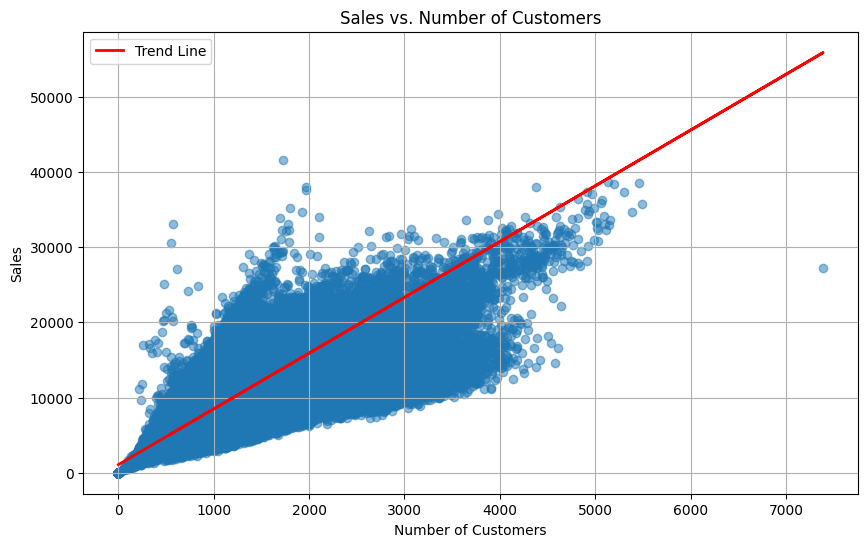

In [15]:
analyzer.analyze_sales_customers_correlation(merged_df)

### Promo effect on sales and customers
Promotions are a key driver of both customer footfall and sales in retail environments like Rossmann stores. Here's an analysis of how promotions influence both sales and customer behavior:

1. Impact on Sales:
* Sales Boost
* Temporary vs. Sustained Growth
* Discount Sensitivity
2. Effect on Customer Footfall:
* Increased Traffic
* Promo-Only Shoppers

2024-09-20 22:52:08,703 - INFO - Promo effect on sales and customers


Average Sales During Promo: 7991.15
Average Sales During Non-Promo: 4406.05
Average Customers During Promo: 820.10
Average Customers During Non-Promo: 517.82


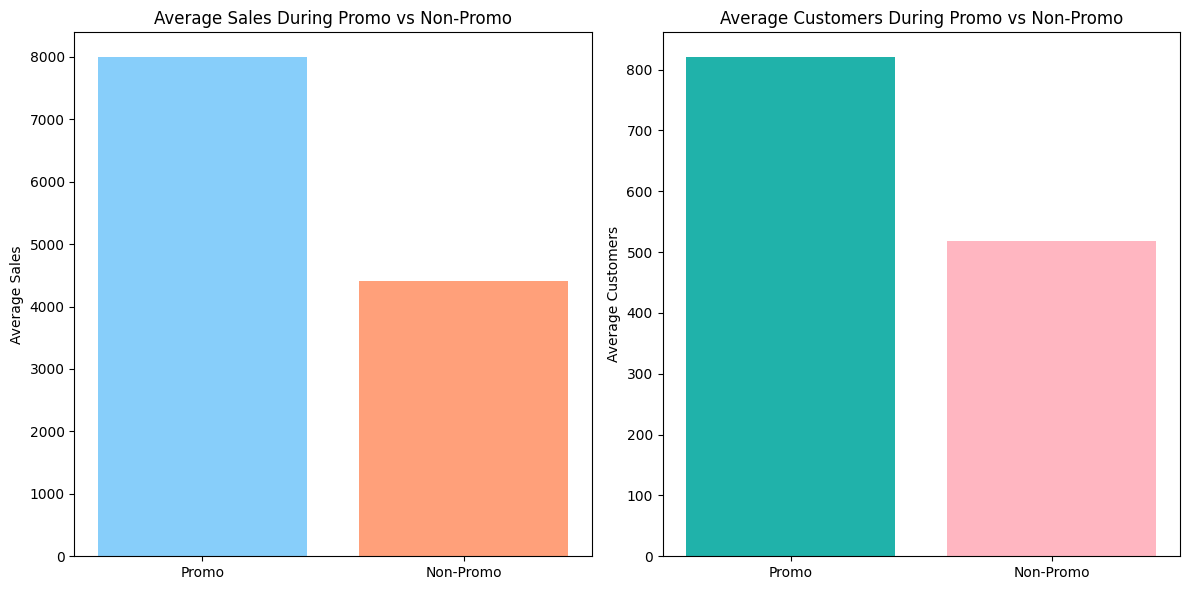

In [16]:
analyzer.analyze_promo_effect(merged_df)

### Effective ways promos can be deployed

2024-09-20 22:52:09,206 - INFO -  effective ways promos can be deployed  


StoreType and Assortment combinations where promos could be effectively deployed:
StoreType: a, Assortment: a
StoreType: a, Assortment: c
StoreType: b, Assortment: a
StoreType: b, Assortment: b
StoreType: b, Assortment: c
StoreType: c, Assortment: a
StoreType: c, Assortment: c
StoreType: d, Assortment: a
StoreType: d, Assortment: c


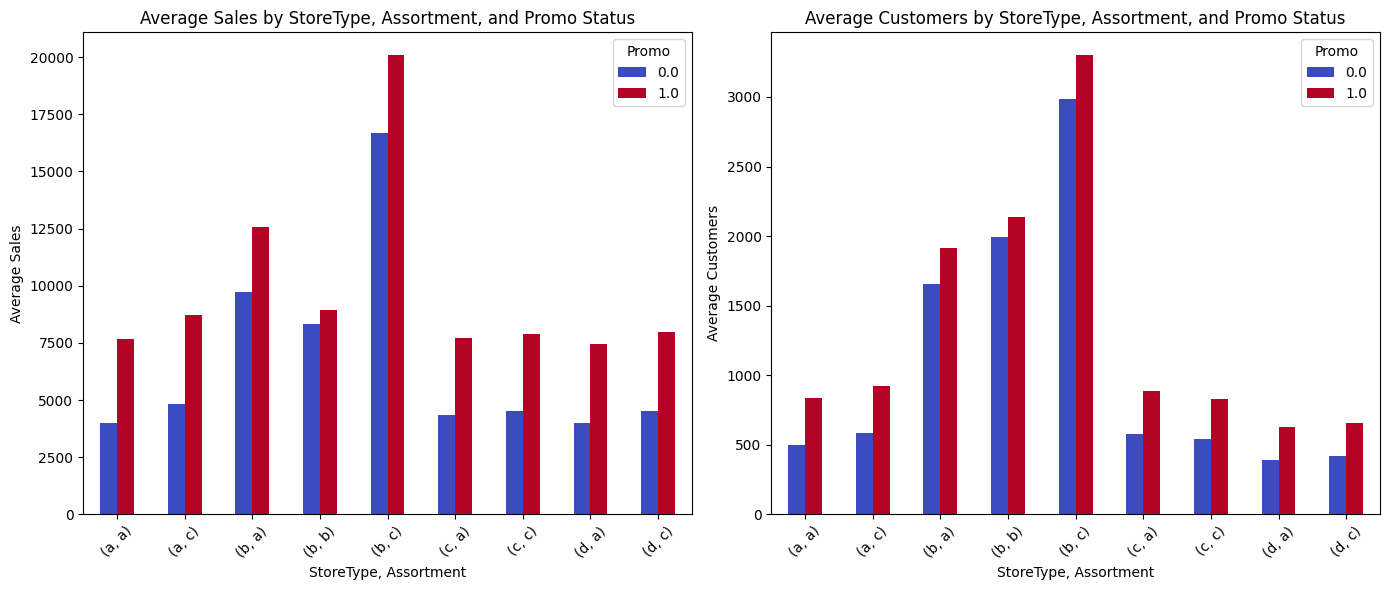

In [17]:
analyzer.analyze_promo_effectiveness_by_store_type_assortment(merged_df)

### Trends of customer behavior during store opening and closing times

2024-09-20 22:52:10,085 - INFO - Trends of customer behavior during store opening and closing times


Average number of customers during open and closed days:
   Open   Customers    Days
0   0.0    0.000000  172817
1   1.0  762.728395  844392


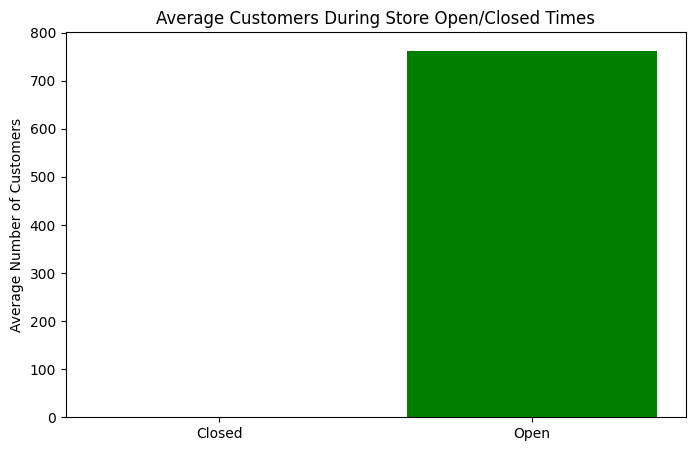

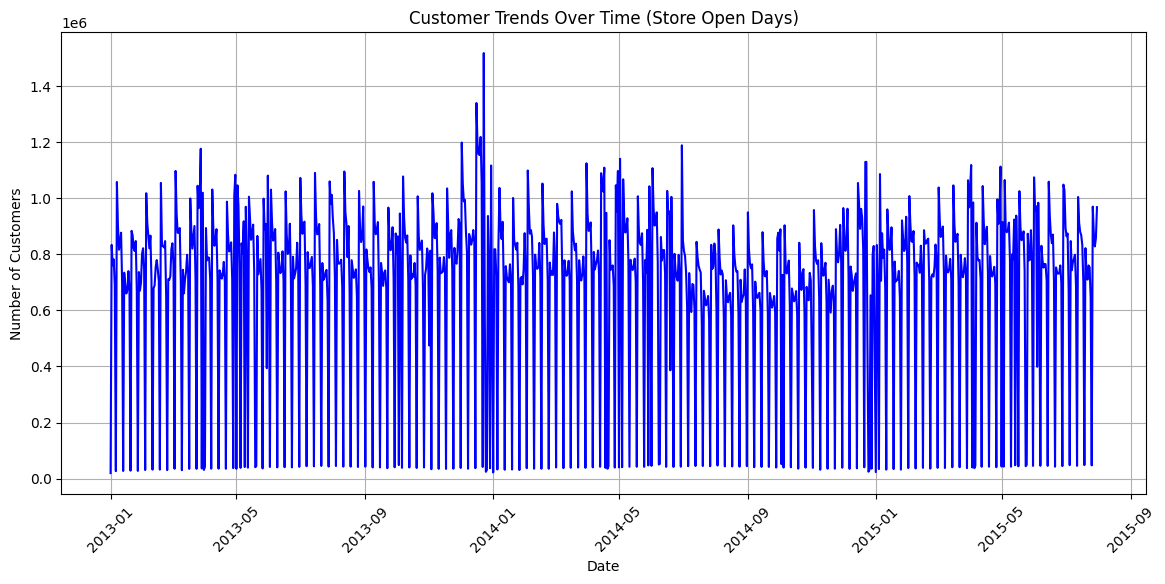

In [18]:
analyzer.analyze_customer_behavior_open_close(merged_df)

### Stores which are open on all weekdays
To compare the weekend sales performance between stores that are open all weekdays and those that are not, we can analyze the sales data based on two main store groups:

1. **Stores that are open every weekday (Monday to Friday).**
2. **Stores that are closed on one or more weekdays.** 

This comparison helps understand if being open consistently throughout the week has any significant impact on weekend sales.

2024-09-20 22:52:11,047 - INFO - stores which are open on all weekdays


Average weekend sales for stores open all weekdays: 11627.11
Average weekend sales for other stores: 2945.49


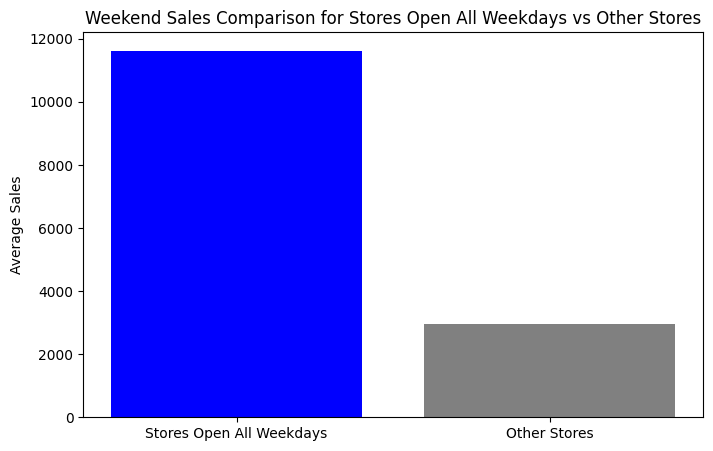

In [19]:
analyzer.analyze_weekday_open_stores(merged_df)

### Sales per assortment types
The assortment level describes the variety of products offered in a store. There are three assortment types in your dataset:

* Basic (a): Basic assortment level.
* Extra (b): More variety than the basic level.
* Extended (c): The highest variety.

To analyze how sales vary by assortment type, we can group the stores by their assortment type and calculate the average sales for each group. Visualizing this data can help us understand if offering a larger variety of products leads to higher sales.

2024-09-20 22:52:11,598 - INFO - sales per assortment types


Average sales by Assortment type:
  Assortment        Sales
0      Basic  5481.026096
1   Extended  6058.676567
2      Extra  8553.931999


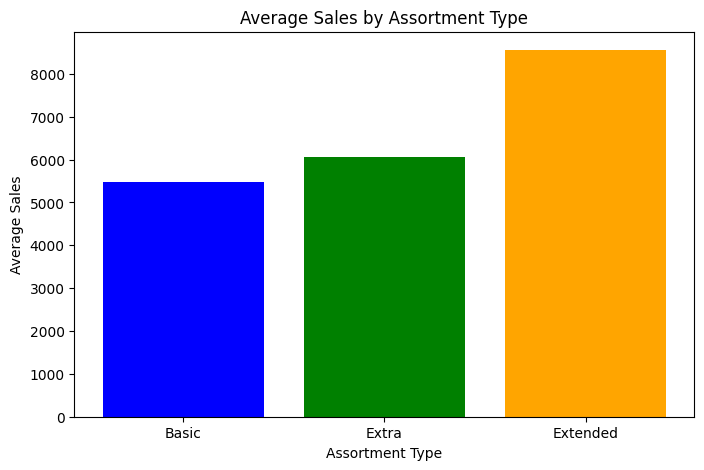

In [20]:
analyzer.analyze_assortment_sales(merged_df)

### Effect of competitor distance
Competitor distance can play a significant role in determining a store’s sales. Stores that are located far from competitors might experience less competition and higher sales, while stores close to competitors may face more pricing or service-based competition.

**Hypotheses to Explore:**
* **Closer Competitors:** Stores located closer to competitors may see a negative effect on their sales due to increased competition.
* **Farther Competitors:** Stores located farther from competitors may have higher sales because customers have fewer alternatives.
* **City Centers:** In highly competitive urban areas (e.g., city centers), the effect of competitor distance may be less significant because customers have more options, and factors like convenience and customer experience may outweigh the proximity of competitors.

2024-09-20 22:52:11,898 - INFO - Effect of competitor distance


Average sales by competition distance range:
  DistanceRange        Sales
0        0-500m  6307.393560
1     500-1000m  5565.373637
2         1-5km  5675.492669
3        5-10km  5567.718124
4         10km+  5685.546657


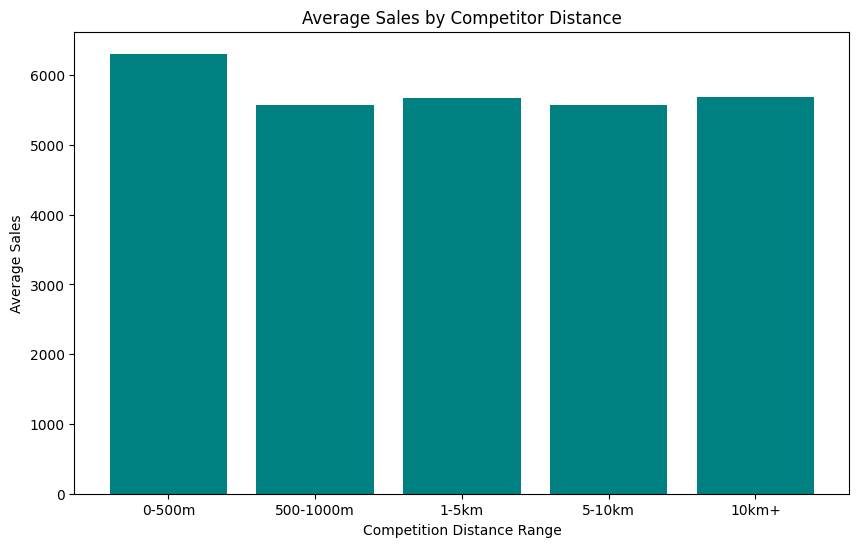


Average Sales Comparison between City Center and Non-City Center Stores:
          Location  Average Sales
0      City Center    6050.127990
1  Non-City Center    5655.572431


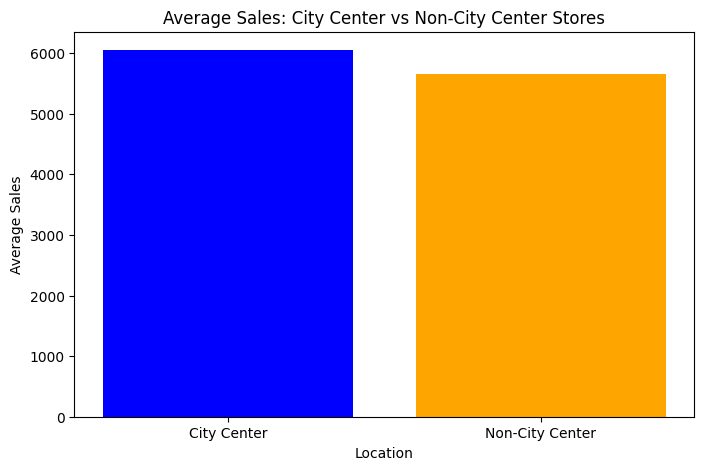

In [21]:
analyzer.analyze_competition_distance_sales(merged_df)